In [1]:
import os
import dit
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pandas as pd
os.chdir("../")
from helpers.group_helpers import loadsyms, classifylowerorders, classifyoversized
from helpers.compare_helpers import appendtoPXS
from jointpdfpython3.measures import synergistic_entropy_upper_bound
from jointpdfpython3.JointProbabilityMatrix import JointProbabilityMatrix
os.chdir("./plot_notebooks")

## CLASSIFY constructed SRVs and APPEND them to uniform X

In [10]:
states = 4
lenX = 2
subjects=np.arange(lenX)
symss = []
data = {'totmi':[],'indivmi':[],'symsort':[],'states':[]}

concsyms, syms = loadsyms(states)
syms = classifyoversized(syms,states)
if 'lower order' in syms.keys():
    syms = classifylowerorders(states,syms)
syms.pop('noisy') # skip noisy SRVs for the figure

juni = JointProbabilityMatrix(2,states,joint_probs='iid')
pX = juni.joint_probabilities.joint_probabilities
upper = synergistic_entropy_upper_bound(juni)
for c in syms.keys():
    cur = syms[c][0]
    print(c,cur)
    pXS = appendtoPXS(2,pX,pX,cur)
    dXS = dit.Distribution.from_ndarray(pXS)
    indivmi = sum([dit.shannon.mutual_information(dXS,[i],[2]) for i in range(2)])
    totmi = dit.shannon.mutual_information(dXS,[0,1],[2])
    data['totmi'].append(totmi)
    data['indivmi'].append(indivmi)
    data['symsort'].append(c)
    data['states'].append(states)


PSRVs 24
noisy 336
lower order 60
oversized 11520
PSRVs [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
oversized states 5 [[0.8 0.  0.  0.  0.2]
 [0.  0.8 0.  0.  0.2]
 [0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.8 0.2]
 [0.  0.8 0.  0.  0.2]
 [0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.8 0.2]
 [0.8 0.  0.  0.  0.2]
 [0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.8 0.2]
 [0.8 0.  0.  0.  0.2]
 [0.  0.8 0.  0.  0.2]
 [0.  0.  0.  0.8 0.2]
 [0.8 0.  0.  0.  0.2]
 [0.  0.8 0.  0.  0.2]
 [0.  0.  0.8 0.  0.2]]
oversized states 6 [[0.66666667 0.         0.         0.         0.16666667 0.16666667]
 [0.         0.66666667 0.         0.         0.16666667 0.16666667]
 [0.         0.         0.66666667 0.         0.16666667 0.16666667]
 [0.         0.         0.         0.66666667 0.16666667 0.16666667]
 [0.         0.66666

## PLOT SRVs vs I(X;SRV)

C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  # This is added back by InteractiveShellApp.init_path()


([], [])

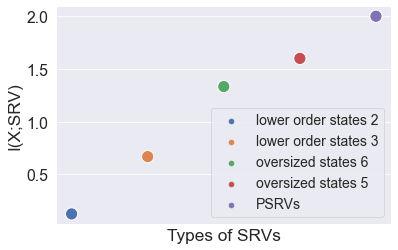

In [11]:
df = pd.DataFrame(data=data)
df=df.sort_values(by=['totmi'])

sns.set_context("paper", font_scale = 1.8, rc={"legend.fontsize": 14})
lineplot = sns.scatterplot(data=df,x='symsort',y='totmi',hue='symsort',s=150)
fig = lineplot.get_figure()
plt.legend(title='')
# plt.title("Mutual information SRVs and uniform input, states="+str(states),fontsize=12)
plt.xlabel("Types of SRVs")
plt.ylabel("I(X;SRV)")
plt.xticks([])
